<IMG SRC="https://i2.wp.com/bdn-data.s3.amazonaws.com/uploads/2021/07/NBA-Finals-Basketball.jpg">

During the 2021 NBA Finals in Milwaukee, WI huge crowds gathered outside the Bucks arena to watch the games. Most of the people were not wearing masks. I was curious if this and other celebrations like it were super spreader events. At first, it looks like the case numbers in Milwaukee County increase sharply after this event, and they do do that. However, when looking at the same time period in similarly sized cities, we can see they also had large increases at the same time.

In [1]:
import numpy as np
import pandas as pd
import statsmodels
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

<A HREF="https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf">Pandas Cheat Sheet</A>

In [2]:
# Covid Data
def cleanData(df):
    df['fips'] = df['fips'].astype(pd.Int32Dtype())
    df['fips'] = df['fips'].apply('{:0>5}'.format)
    df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
    return(df)   
    
c20 = cleanData(pd.read_csv('./RawData/us-counties-2020_raw.csv', na_filter=True))
c21 = cleanData(pd.read_csv('./RawData/us-counties-2021_raw.csv', na_filter=True))
c22 = cleanData(pd.read_csv('./RawData/us-counties-2022_raw.csv', na_filter=True))

In [3]:
def plotCases(df, event):
    event = pd.DataFrame({"date": event},index=["event"])
    event = pd.to_datetime(event['date'], format='%Y-%m-%d')
    fig, ax = plt.subplots()
    ax.plot(df['date'], df['cases'])
    ax.set(xlabel='date', ylabel='cases',
           title='')
    ax.grid()
    ax.axvline(event, color='k', linestyle='--')
    #fig.savefig("test.png")
    plt.show()
    
def plotNewCases(df, event):
    event = pd.DataFrame({"date": event},index=["event"])
    event = pd.to_datetime(event['date'], format='%Y-%m-%d')
    fig, ax = plt.subplots()
    ax.plot(df['date'], df['newcases'])
    ax.set(xlabel='date', ylabel='cases',
           title='')
    ax.grid()
    ax.axvline(event, color='k', linestyle='--')
    #fig.savefig("test.png")
    plt.show()

Here is the plot of cumulative cases (top) and new cases (bottom) in Milwaukee County with the last day of the 2021 NBA Finals marked. Cases clearly increase soon after the games.

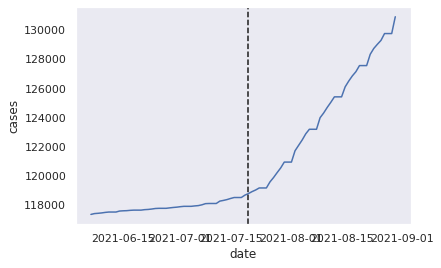

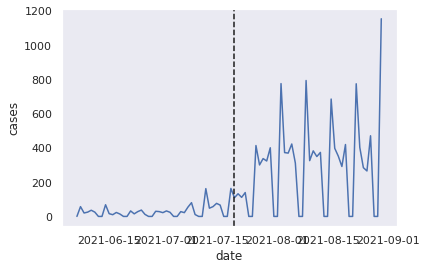

In [8]:
# 2021 NBA Finals - July 6 - July 20 Milwaukee, WI
nba21 = c21.query("date >= '2021-06-06' and date <= '2021-08-30' and \
                  (county=='Milwaukee') and \
                  state=='Wisconsin'")
plotCases(nba21, '2021-07-20')
nba21=nba21.assign(newcases = (nba21['cases']-nba21['cases'].shift(1)).fillna(0))
plotNewCases(nba21, '2021-07-20')

However, when we look at similarly sized cities at the same time, they show similar increases.

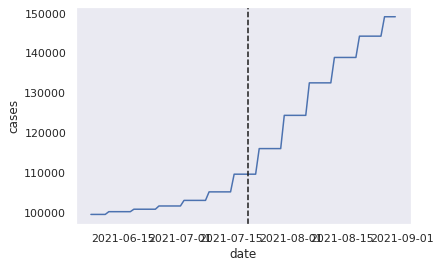

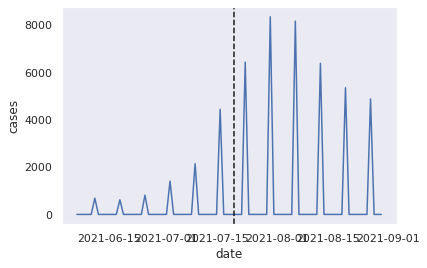

In [9]:
# Compare to Jacksonville, FL
duval = c21.query("date >= '2021-06-06' and date <= '2021-08-30' and \
                  (county=='Duval') and \
                  state=='Florida'")
plotCases(duval, '2021-07-20')
duval=duval.assign(newcases = (duval['cases']-duval['cases'].shift(1)).fillna(0))
plotNewCases(duval, '2021-07-20')

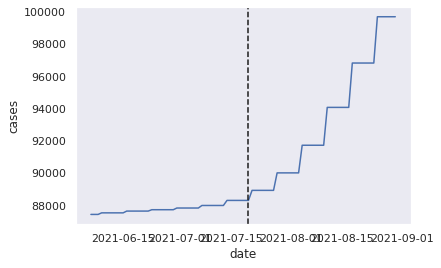

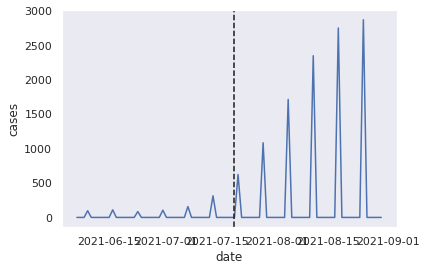

In [10]:
# Compare to Oklahoma, OK
oklahoma = c21.query("date >= '2021-06-06' and date <= '2021-08-30' and \
                  (county=='Oklahoma') and \
                  state=='Oklahoma'")
plotCases(oklahoma, '2021-07-20')
oklahoma=oklahoma.assign(newcases = (oklahoma['cases']-oklahoma['cases'].shift(1)).fillna(0))
plotNewCases(oklahoma, '2021-07-20')

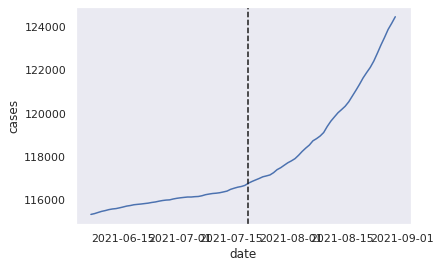

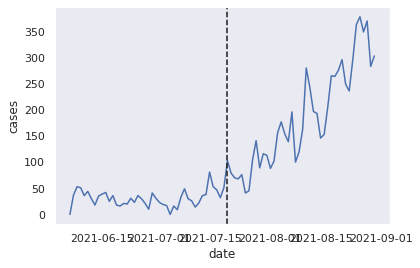

In [11]:
# Compare to Cleveland, OH
cleveland = c21.query("date >= '2021-06-06' and date <= '2021-08-30' and \
                  (county=='Cuyahoga') and \
                  state=='Ohio'")
plotCases(cleveland, '2021-07-20')
cleveland=cleveland.assign(newcases = (cleveland['cases']-cleveland['cases'].shift(1)).fillna(0))
plotNewCases(cleveland, '2021-07-20')

Here are some more cummulative case plots for other cities with large sporting events. Some show increases in cases and some do not.

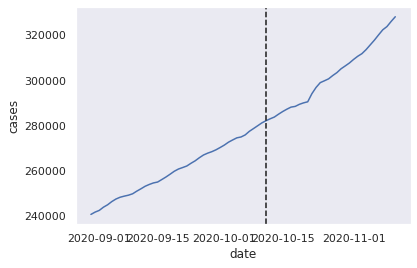

In [6]:
# 2020 NBA Finals - Sept 30 - Oct 11 Los Angeles, CA - Played in Florida, won by LA Lakers
nba20 = c20.query("date >= '2020-08-30' and date <= '2020-11-11' and county=='Los Angeles' and state=='California'")
plotCases(nba20, '2020-10-11')

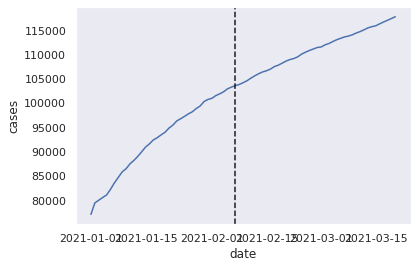

In [13]:
# 2021 Super Bowl 2021-02-07 Tampa Bay, FL
sb21 = c21.query("date >= '2021-01-01' and date <= '2021-03-20' and county=='Hillsborough' and state=='Florida'")
plotCases(sb21, '2021-02-07')

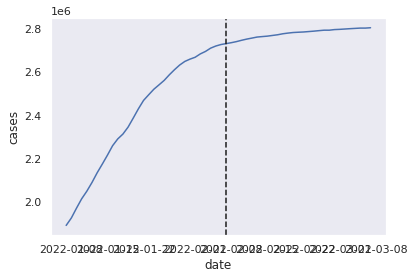

In [14]:
# 2022 Super Bowl 2021-02-07 Won: Los Angeles Rams, played in: Los Angeles
sb22 = c22.query("date >= '2022-01-07' and date <= '2022-03-07' and county=='Los Angeles' and state=='California'")
plotCases(sb22, '2022-02-07')

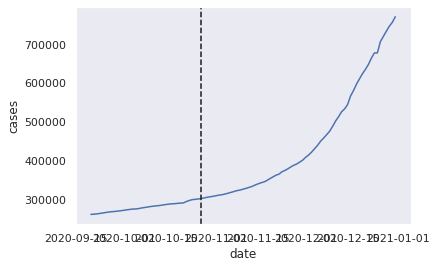

In [15]:
# 2020 MLB World Series Oct 20-27 Los Angeles, CA
ws20 = c20.query("date >= '2020-09-20' and date <= '2021-11-27' and county=='Los Angeles' and state=='California'")
plotCases(ws20, '2020-10-27')

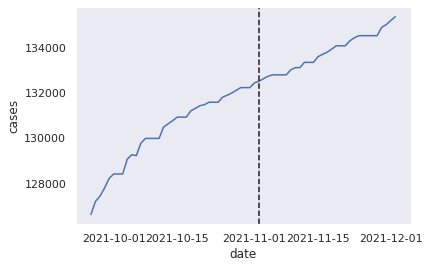

In [16]:
# 2021 MLB World Series Oct 26 - Nov 2 Atlanta, GA Winner: Atlanta Braves
#start = '2021-09-26'
#end = '2021-12-02'
#county = 'Fulton'
#state = 'Georgia'
ws21 = c21.query("date >= '2021-09-26' and date <= '2021-12-02' and county=='Fulton' and state=='Georgia'")
plotCases(ws21, '2021-11-02')

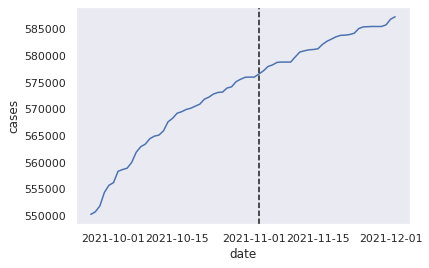

In [17]:
# 2021 MLB World Series Oct 26 - Nov 2 Houston, TX Looser: Houston Astros
#start = '2021-09-26'
#end = '2021-12-02'
#county = 'Fulton'
#state = 'Georgia'
ws21 = c21.query("date >= '2021-09-26' and date <= '2021-12-02' and county=='Harris' and state=='Texas'")
plotCases(ws21, '2021-11-02')

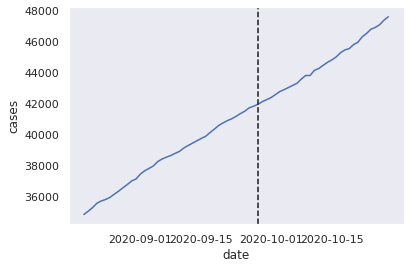

In [18]:
# 2020 NHL Stanley Cup Finals - Sept 19 - Sept 28 Won by: Tampa Bay Lightning Played in: Edmonton, AB
nhl20 = c20.query("date >= '2020-08-19' and date <= '2020-10-28' and county=='Hillsborough' and state=='Florida'")
plotCases(nhl20, '2020-09-28')

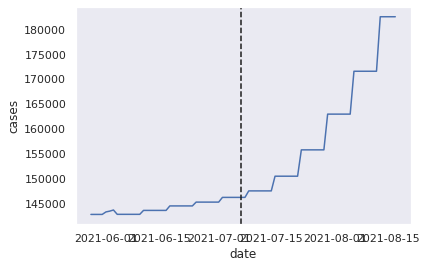

In [4]:
# 2021 NHL Stanley Cup Finals - June 28 - July 7 Tampa Bay, FL
nhl21 = c21.query("date >= '2021-05-28' and date <= '2021-08-17' and county=='Hillsborough' and state=='Florida'")
plotCases(nhl21, '2021-07-07')

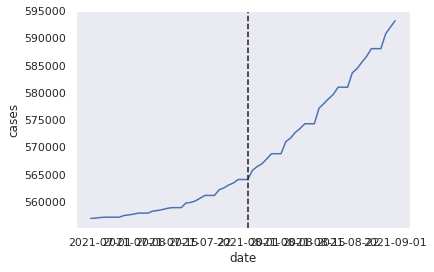

In [20]:
# 2021 Lollapalooza July 29 - August 1 Chicago, IL
lolla21 = c21.query("date >= '2021-06-29' and date <= '2021-09-01' and county=='Cook' and state=='Illinois'")
plotCases(lolla21, '2021-08-01')